# Binary Classification of Breast Cancer Patients

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.


- Number of Instances: 699 (as of 15 July 1992)

- Number of Attributes: 10 plus the **diagnosis attribute**

- Attribute Information: (class attribute has been moved to last column)


###  Attribute

1. ID number

2. Clump Thickness 

3. Uniformity of Cell Size 

4. Uniformity of Cell Shape

5. Marginal Adhesion

6. Single Epithelial Cell Size

7. Bare Nuclei

8. Bland Chromatin

9. Normal Nucleoli 

10. Mitoses

11. Diagnosis **(2 for benign, 4 for malignant)**

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="binary-classification-of-breast-cancer-patients")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/binary-classification-of-breast-cancer-patients" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/donatusprince/binary-classification-of-breast-cancer-patients


'https://jovian.ai/donatusprince/binary-classification-of-breast-cancer-patients'

In [4]:
import pandas as pd

In [5]:
patient = pd.read_csv('breast-cancer-wisconsin.data', header=None)

### We're renaming the 11 columns with those given in the attribute list for the given dataset :

*['id_number', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'diagnosis']*

In [6]:
patient.columns = ['id_number', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'diagnosis']

### *Handling the missing value and converting the data type to int*

In [7]:
patient.bare_nuclei = (pd.to_numeric(patient['bare_nuclei'], errors='coerce')).fillna(0)

In [8]:
patient.bare_nuclei = patient['bare_nuclei'].astype(int)

### *Converting the “diagnosis” column to now be 0 representing benign and 1 representing malignant*

In [9]:
patient.diagnosis = patient.diagnosis.replace(to_replace = [2,4],value = [0,1])

In [10]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id_number                    699 non-null    int64
 1   clump_thickness              699 non-null    int64
 2   uniformity_of_cell_size      699 non-null    int64
 3   uniformity_of_cell_shape     699 non-null    int64
 4   marginal_adhesion            699 non-null    int64
 5   single_epithelial_cell_size  699 non-null    int64
 6   bare_nuclei                  699 non-null    int64
 7   bland_chromatin              699 non-null    int64
 8   normal_nucleoli              699 non-null    int64
 9   mitoses                      699 non-null    int64
 10  diagnosis                    699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [11]:
patient.diagnosis.value_counts()

0    458
1    241
Name: diagnosis, dtype: int64

### *Creating a correlation matrix for all the int columns in the german dataset and visualizing the correlation using heatmap from seaborn.*

In [12]:
corr = patient.corr()

In [13]:
corr

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnosis
id_number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.089871,-0.060051,-0.052072,-0.034901,-0.080226
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
uniformity_of_cell_size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
uniformity_of_cell_shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
single_epithelial_cell_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
bare_nuclei,-0.089871,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
bland_chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

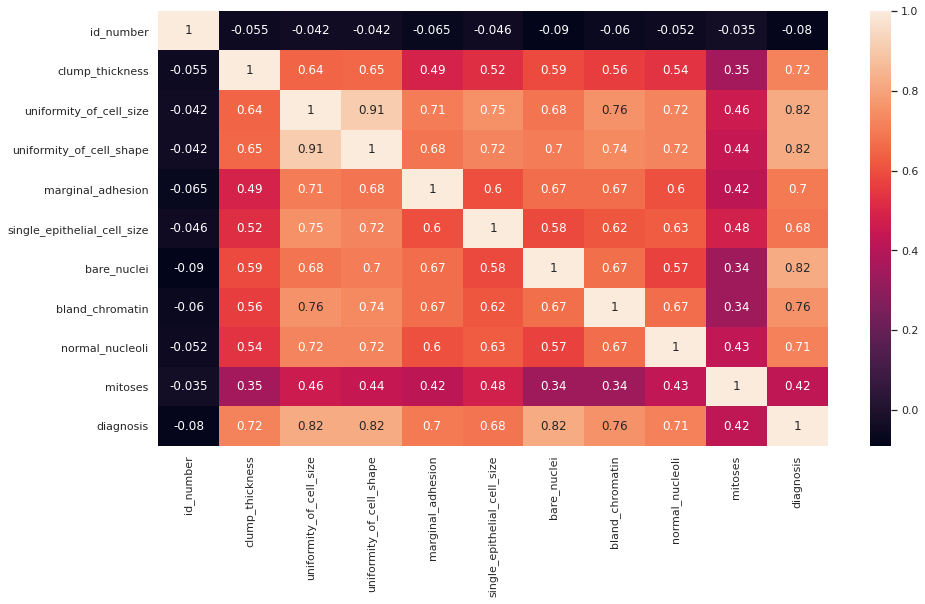

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True)

plt.show()

*Visualizing the correlation using heatmap from seaborn.¶*

### *Graphically showing the value counts of normal nucleoli for patients diagnosied with benign and malignant.*

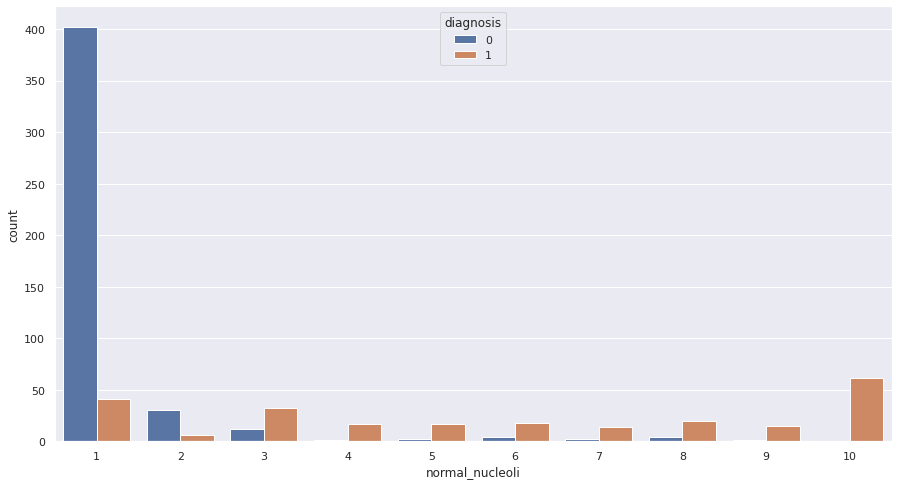

In [16]:
sns.countplot(x='normal_nucleoli', data=patient, hue='diagnosis')

plt.show()

In [18]:
X = patient.iloc[:, :10]
y = patient.diagnosis

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### *Scaling and transforming our data values to fit using the Standard Scaler.*

In [20]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
pred = model.predict(X_test)

### *Getting the accuracy score of our predition*

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
score = accuracy_score(y_test, pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.9666666666666667


### *Geting the accuracy of the confusion matrix and all other metrics for our model.*

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [43]:
accuracy = confusion_matrix(y_test, pred)
print('The Accuracy of Classifier: \n', accuracy)

The Accuracy of Classifier: 
 [[129   2]
 [  5  74]]


### Using the predicted values(pred) and our actual values (y_test), we can create a confusion matrix with the confusion_matrix function.

 *Then, using the ravel( ) method of our confusion_matrix function, we can get the True Positive, True Negative, False Positive, and False Negative values*

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 129
False Positive: 2
False Negative: 5
True Positive: 74


In [45]:
matrix = classification_report(y_test, pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       131
           1       0.97      0.94      0.95        79

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



### *Computing and visually plotting the ROC-AUC score of the models*

In [51]:
auc_score = roc_auc_score(y_test, pred)
print('auc_score:', auc_score)

auc_score: 0.9607208425934873


In [48]:
x_pred, y_pred, _ = roc_curve(y_test, pred)

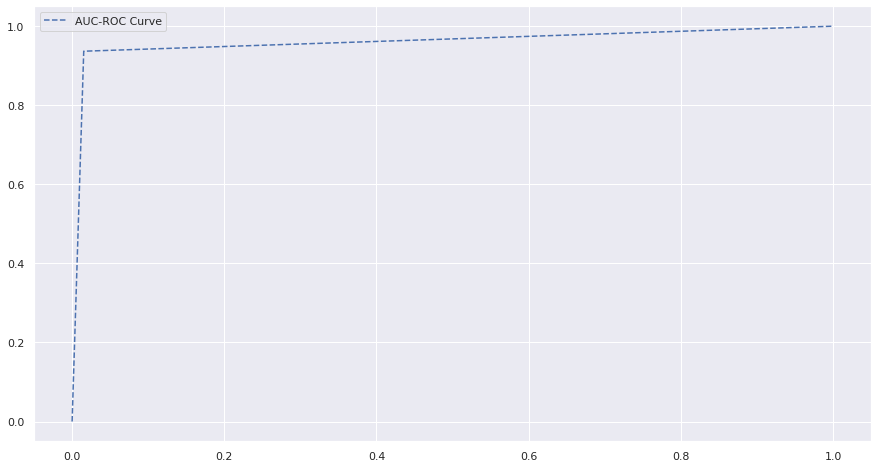

In [49]:
plt.plot(x_pred, y_pred, linestyle='--', label='AUC-ROC Curve')
plt.legend()

plt.show()

### *Comparing the LogisticRegression Model with another model with RandomForestClasifier*

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier()

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
score = accuracy_score(y_test, rfc_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.9619047619047619


In [38]:
accuracy = confusion_matrix(y_test, rfc_pred)
print('The Accuracy of Classifier: \n', accuracy)

The Accuracy of Classifier: 
 [[128   3]
 [  5  74]]


In [40]:
matrix = classification_report(y_test, rfc_pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       131
           1       0.96      0.94      0.95        79

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



### *Computing and visually plotting the ROC-AUC score of the models*

In [52]:
auc_score = roc_auc_score(y_test, rfc_pred)
print('auc_score:', auc_score)

auc_score: 0.9569040487003575


In [56]:
rfc_x_pred, rfc_y_pred, _ = roc_curve(y_test, rfc_pred)

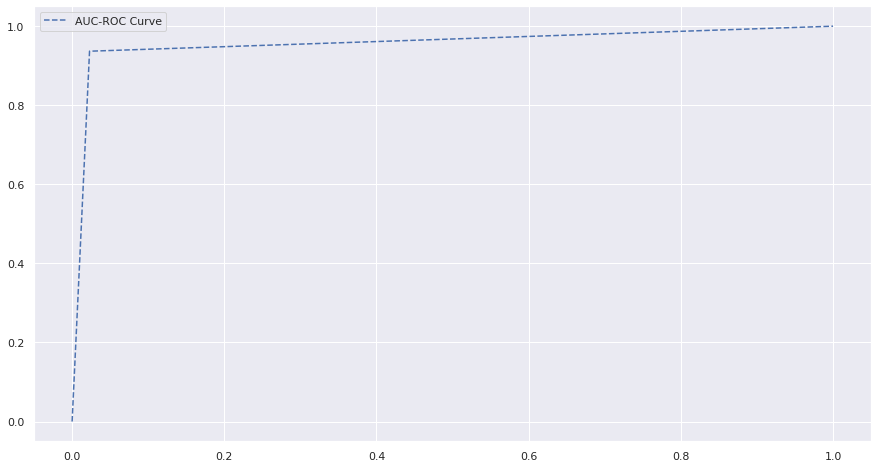

In [57]:
plt.plot(rfc_x_pred, rfc_y_pred, linestyle='--', label='AUC-ROC Curve')
plt.legend()

plt.show()

### *Saving and committing project file*

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/binary-classification-of-breast-cancer-patients" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/donatusprince/binary-classification-of-breast-cancer-patients


'https://jovian.ai/donatusprince/binary-classification-of-breast-cancer-patients'